In [3]:
import scipy.stats as stats
import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [4]:
import statsmodels.stats.multitest as mt

In [6]:
datA = pd.read_excel('LibAs.xlsx')
datA.set_index('ID', inplace=True)
datA.rename(columns={"Cas9_Activated24h_As_1": "Cas9_Activated24h_1",
                    "Cas9_Activated24h_As_2":"Cas9_Activated24h_2",
                    "WT_Total24h_As_1": "WT_Total24h_1", 
                    "WT_Total24h_As_2": "WT_Total24h_2", 
                    "Cas9_Quiescent24h_As_1":"Cas9_Quiescent24h_1",
                    "Cas9_Quiescent24h_As_2":"Cas9_Quiescent24h_2"}, inplace=True)
datA['Gene'] = datA.index
for ii in range(datA.index.shape[0]):
    datA.Gene[ii] = datA.index.str.split('_')[ii][0]
datA.Gene[datA.Gene.str.contains("NonTargetingControl")] = 'non-targeting'
################
datB = pd.read_excel('LibB.xlsx')
datB.set_index('ID', inplace=True)
datB.rename(columns={"Cas9_Activated24h_B_1": "Cas9_Activated24h_1",
                    "Cas9_Activated24h_B_2":"Cas9_Activated24h_2",
                    "WT_Total24h_B_1": "WT_Total24h_1", 
                    "WT_Total24h_B_2": "WT_Total24h_2", 
                    "Cas9_Quiescent24h_B_1":"Cas9_Quiescent24h_1",
                    "Cas9_Quiescent24h_B_2":"Cas9_Quiescent24h_2"}, inplace=True)
datB['Gene'] = datB.index
for ii in range(datB.index.shape[0]):
    datB.Gene[ii] = datB.index.str.split('_')[ii][0]
datB.Gene[datB.Gene.str.contains("NonTargetingControl")] = 'non-targeting'
################
datP = pd.read_excel('LibP1.xlsx')
datP.set_index('ID', inplace=True)
datP.rename(columns={"Cas9_Activated24h_LibP1_1": "Cas9_Activated24h_1",
                    "Cas9_Activated24h_LibP1_2":"Cas9_Activated24h_2",
                    "WT_Total24h_LibP1_1": "WT_Total24h_1", 
                    "WT_Total24h_LibP1_2": "WT_Total24h_2", 
                    "Cas9_Quiescent24h_LibP1_1":"Cas9_Quiescent24h_1",
                    "Cas9_Quiescent24h_LibP1_2":"Cas9_Quiescent24h_2"}, inplace=True)
datP['Gene'] = datP.index
for ii in range(datP.index.shape[0]):
    datP.Gene[ii] = datP.index.str.split('_')[ii][0]
datP.Gene[datP.Gene.str.contains("NonTargetingControl")] = 'non-targeting'
################
datP2 = pd.read_excel('LibP2.xlsx')
datP2.set_index('ID', inplace=True)
datP2.rename(columns={"Cas9_Activated24h_LibP2_1": "Cas9_Activated24h_1",
                    "Cas9_Activated24h_LibP2_2":"Cas9_Activated24h_2",
                    "WT_Total24h_LibP2_1": "WT_Total24h_1", 
                    "WT_Total24h_LibP2_2": "WT_Total24h_2", 
                    "Cas9_Quiescent24h_LibP2_1":"Cas9_Quiescent24h_1",
                    "Cas9_Quiescent24h_LibP2_2":"Cas9_Quiescent24h_2"}, inplace=True)
datP2['Gene'] = datP2.index
for ii in range(datP2.index.shape[0]):
    datP2.Gene[ii] = datP2.index.str.split('_')[ii][0]
datP2.Gene[datP2.Gene.str.contains("NonTargetingControl")] = 'non-targeting'
################
datR = pd.read_excel('LibR1Br.xlsx')
datR.set_index('ID', inplace=True)
datR.rename(columns={"Cas9_Activated24h_R1Br_1": "Cas9_Activated24h_1",
                    "Cas9_Activated24h_R1Br_2":"Cas9_Activated24h_2",
                    "WT_Total24h_R1Br_1": "WT_Total24h_1", 
                    "WT_Total24h_R1Br_2": "WT_Total24h_2", 
                    "Cas9_Quiescent24h_R1Br_1":"Cas9_Quiescent24h_1",
                    "Cas9_Quiescent24h_R1Br_2":"Cas9_Quiescent24h_2"}, inplace=True)
datR['Gene'] = datR.index
for ii in range(datR.index.shape[0]):
    datR.Gene[ii] = datR.index.str.split('_')[ii][0]
datR.Gene[datR.Gene.str.contains("NonTargetingControl")] = 'non-targeting'
################
datR2 = pd.read_excel('LibR2Br.xlsx')
datR2.set_index('ID', inplace=True)
datR2.rename(columns={"Cas9_Activated24h_R2Br_1": "Cas9_Activated24h_1",
                    "Cas9_Activated24h_R2Br_2":"Cas9_Activated24h_2",
                    "WT_Total24h_R2Br_1": "WT_Total24h_1", 
                    "WT_Total24h_R2Br_2": "WT_Total24h_2", 
                    "Cas9_Quiescent24h_R2Br_1":"Cas9_Quiescent24h_1", 
                    "Cas9_Quiescent24h_R2Br_2":"Cas9_Quiescent24h_2"}, inplace=True)
datR2['Gene'] = datR2.index
for ii in range(datR2.index.shape[0]):
    datR2.Gene[ii] = datR2.index.str.split('_')[ii][0]
datR2.Gene[datR2.Gene.str.contains("NonTargetingControl")] = 'non-targeting'
################


for ii in datA.columns[0:6]:
    datA[ii] = datA[ii] / stats.gmean(datA[datA.Gene == 'non-targeting'][ii])
    datB[ii] = datB[ii] / stats.gmean(datB[datB.Gene == 'non-targeting'][ii])
    datP[ii] = datP[ii] / stats.gmean(datP[datP.Gene == 'non-targeting'][ii])
    datP2[ii] = datP2[ii] / stats.gmean(datP2[datP2.Gene == 'non-targeting'][ii])
    datR[ii] = datR[ii] / stats.gmean(datR[datR.Gene == 'non-targeting'][ii])
    datR2[ii] = datR2[ii] / stats.gmean(datR2[datR2.Gene == 'non-targeting'][ii])

dat = pd.concat([datA, datB, datP, datP2, datR, datR2]) # datR2

del datA
del datB
del datP
del datP2
del datR


/tmp/ipykernel_667/2284156015.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datA.Gene[ii] = datA.index.str.split('_')[ii][0]
/tmp/ipykernel_667/2284156015.py:11: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  datA.Gene[ii] = datA.index.str.split('_')[ii][0]
/tmp/ipykernel_667/2284156015.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datA.Gene[ii] = datA.index.str.split('_')[ii][0]
/tmp/ipykernel_667/2284156015.py:11: 

In [7]:
dat

,Cas9_Activated24h_1,Cas9_Quiescent24h_1,WT_Total24h_1,Cas9_Activated24h_2,Cas9_Quiescent24h_2,WT_Total24h_2,Gene
ID,,,,,,,
Actl6a_As_76114,0.320118,0.817544,1.130307,0.436182,0.822826,1.290003,Actl6a
Actl6a_As_76115,0.406543,0.735717,1.199680,0.227975,0.513242,0.848545,Actl6a
Actl6a_As_76116,0.243280,0.301276,0.750957,0.272560,0.417529,0.831401,Actl6a
Arid1a_As_73073,1.756924,0.847920,2.615059,1.149790,0.636150,1.200690,Arid1a
Arid1a_As_73074,0.940326,0.603521,0.848166,0.911839,0.495905,1.131314,Arid1a
...,...,...,...,...,...,...,...
NonTargetingControlGuideForMouse_0056_R2.Br_66461,0.796777,1.182589,1.054870,1.078677,1.277047,1.211966,non-targeting
NonTargetingControlGuideForMouse_0057_R2.Br_66462,1.240260,0.881100,0.840841,0.787208,0.789098,0.999041,non-targeting
NonTargetingControlGuideForMouse_0058_R2.Br_66463,1.525960,1.125553,1.243675,1.311609,1.397174,1.234427,non-targeting


In [10]:
datT = pd.read_excel('LibTF.xlsx')
datT.set_index('ID', inplace=True)
datT.rename(columns={"Cas9_Activated24h_TF_1": "Cas9_Activated24h_1",
                    "Cas9_Activated24h_TF_2":"Cas9_Activated24h_2",
                     "Cas9_Activated24h_TF_3":"Cas9_Activated24h_3",
                     "Cas9_Activated24h_TF_4":"Cas9_Activated24h_4",
                    "WT_TF_Total24_1": "WT_Total24h_1", 
                    "WT_TF_Total24_2": "WT_Total24h_2", 
                    "Cas9_Quiescent24h_TF_1":"Cas9_Quiescent24h_1",
                    "Cas9_Quiescent24h_TF_2":"Cas9_Quiescent24h_2",
                    "Cas9_Quiescent24h_TF_3":"Cas9_Quiescent24h_3",
                    "Cas9_Quiescent24h_TF_4":"Cas9_Quiescent24h_4"}, inplace=True)
datT['Gene'] = datT.index
for ii in range(datT.index.shape[0]):
    datT.Gene[ii] = datT.index.str.split('_')[ii][0]
datT.Gene = datT.Gene.str.capitalize()
datT.Gene[datT.Gene.str.contains("Nontargetingcontrol")] = 'non-targeting'
for ii in datT.columns[0:10]:
    datT[ii] = datT[ii] / stats.gmean(datT[datT.Gene == 'non-targeting'][ii])

/tmp/ipykernel_667/944543707.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datT.Gene[ii] = datT.index.str.split('_')[ii][0]
/tmp/ipykernel_667/944543707.py:15: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  datT.Gene[ii] = datT.index.str.split('_')[ii][0]
/tmp/ipykernel_667/944543707.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datT.Gene[ii] = datT.index.str.split('_')[ii][0]
/tmp/ipykernel_667/944543707.py:15: Futu

In [11]:
datT

,Cas9_Activated24h_1,Cas9_Activated24h_2,Cas9_Quiescent24h_1,Cas9_Quiescent24h_2,Cas9_Activated24h_3,Cas9_Quiescent24h_3,Cas9_Activated24h_4,Cas9_Quiescent24h_4,WT_Total24h_1,WT_Total24h_2,Gene
ID,,,,,,,,,,,
ACTA2_1,0.952956,0.935615,0.911050,0.819627,1.380106,0.960968,0.803237,1.056865,1.202413,0.978251,Acta2
ACTA2_2,1.115914,1.229533,1.015170,1.376152,1.483678,0.945760,1.010465,1.053105,1.416164,1.233404,Acta2
ACTA2_3,0.948788,1.613969,1.550724,0.849424,1.397885,1.418005,1.403605,1.266746,1.400105,1.408876,Acta2
ATF1_1,0.831274,0.727179,0.739363,0.864508,0.516603,0.486573,0.618077,0.430802,0.591551,0.528165,Atf1
ATF1_2,1.036690,1.242639,0.961933,1.147985,0.868802,1.033260,0.831375,0.985030,1.145240,1.216128,Atf1
...,...,...,...,...,...,...,...,...,...,...,...
ZFP503_2,0.610959,0.565598,0.907658,0.733255,0.960796,0.718560,0.513513,1.243132,0.658481,1.152820,Zfp503
ZFP503_3,0.438235,0.868149,0.719217,0.756943,1.009658,1.010107,0.747795,0.924896,0.849871,1.124648,Zfp503
ZFP68_1,0.745176,0.908872,0.634205,0.535778,0.663071,0.746305,0.475697,0.825025,0.560957,0.744715,Zfp68


# Quick bar plots

In [12]:
dat_tmp1 = datT.copy()
dat_g_tmp1 = dat_tmp1[dat_tmp1.Gene == 'Tgfbr1'].mean()
dat_tmp1 = dat.copy()
dat_g_tmp2 = dat_tmp1[dat_tmp1.Gene == 'Tgfbr1'].mean()


Tgfb_Act1 = stats.gmean( dat_g_tmp1[dat_g_tmp1.index.str.contains('Activated')] )
Tgfb_Act2 = stats.gmean( dat_g_tmp2[dat_g_tmp2.index.str.contains('Activated')] )

Tgfb_Qui1 = stats.gmean( dat_g_tmp1[dat_g_tmp1.index.str.contains('Quiescent')] )
Tgfb_Qui2 = stats.gmean( dat_g_tmp2[dat_g_tmp2.index.str.contains('Quiescent')] )

dat_tmp1 = datT.copy()
dat_g_tmp1 = dat_tmp1[dat_tmp1.Gene == 'non-targeting'].mean()
dat_tmp1 = dat.copy()
dat_g_tmp2 = dat_tmp1[dat_tmp1.Gene == 'non-targeting'].mean()


NTC_Act1 = stats.gmean( dat_g_tmp1[dat_g_tmp1.index.str.contains('Activated')] )
NTC_Act2 = stats.gmean( dat_g_tmp2[dat_g_tmp2.index.str.contains('Activated')] )

NTC_Qui1 = stats.gmean( dat_g_tmp1[dat_g_tmp1.index.str.contains('Quiescent')] )
NTC_Qui2 = stats.gmean( dat_g_tmp2[dat_g_tmp2.index.str.contains('Quiescent')] )


dat_tmp1 = datT.copy()
dat_g_tmp1 = dat_tmp1[dat_tmp1.Gene == 'Smad3'].mean()
dat_tmp1 = dat.copy()
dat_g_tmp2 = dat_tmp1[dat_tmp1.Gene == 'Smad3'].mean()


Smad3_Act1 = stats.gmean( dat_g_tmp1[dat_g_tmp1.index.str.contains('Activated')] )
Smad3_Act2 = stats.gmean( dat_g_tmp2[dat_g_tmp2.index.str.contains('Activated')] )

Smad3_Qui1 = stats.gmean( dat_g_tmp1[dat_g_tmp1.index.str.contains('Quiescent')] )
Smad3_Qui2 = stats.gmean( dat_g_tmp2[dat_g_tmp2.index.str.contains('Quiescent')] )




TypeError: Could not convert ['Tgfbr1Tgfbr1Tgfbr1'] to numeric

In [16]:
dat_tmp1[dat_tmp1.Gene == 'Tgfbr1']

,Cas9_Activated24h_1,Cas9_Activated24h_2,Cas9_Quiescent24h_1,Cas9_Quiescent24h_2,Cas9_Activated24h_3,Cas9_Quiescent24h_3,Cas9_Activated24h_4,Cas9_Quiescent24h_4,WT_Total24h_1,WT_Total24h_2,Gene
ID,,,,,,,,,,,
TGFBR1_1,0.000653,0.001189,4.255145,5.118034,0.042818,3.646793,0.079429,4.249993,0.869285,1.235910,Tgfbr1
TGFBR1_2,0.090826,0.082417,3.715576,5.887753,0.200315,3.245147,0.004255,3.540753,0.752296,1.114014,Tgfbr1
TGFBR1_3,0.237298,0.177377,3.606887,4.367982,0.188894,2.435960,0.046222,3.883927,0.530058,0.799953,Tgfbr1


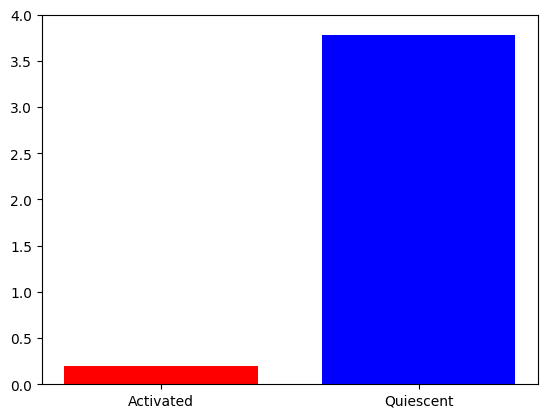

In [7]:
plt.bar(['Activated','Quiescent'], [Smad3_Act1, Smad3_Qui1], color = ['r','b'],width = 0.75)
plt.ylim((0,4))
plt.savefig("figures/bulk_analysis_barplot_Smad3.png", dpi=800, bbox_inches='tight')
plt.savefig("figures/bulk_analysis_barplot_Smad3.svg", dpi=800, bbox_inches='tight')
plt.savefig("figures/bulk_analysis_barplot_Smad3.pdf", dpi=800, bbox_inches='tight')



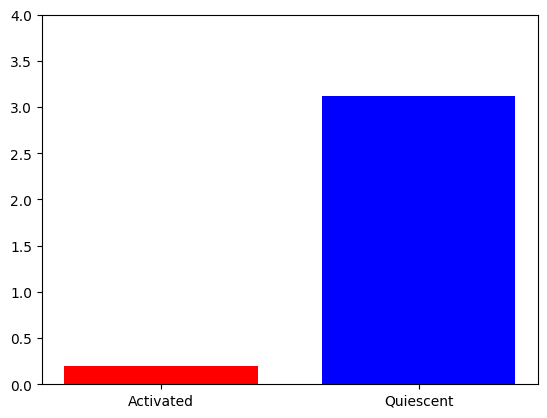

In [8]:
plt.bar(['Activated','Quiescent'], [(Tgfb_Act1 + Tgfb_Act2)/2, (Tgfb_Qui1 + Tgfb_Qui2)/2], color = ['r','b'],width = 0.75)
plt.ylim((0,4))
plt.ylim((0,4))
plt.savefig("figures/bulk_analysis_barplot_Tgfbr1.png", dpi=800, bbox_inches='tight')
plt.savefig("figures/bulk_analysis_barplot_Tgfbr1.svg", dpi=800, bbox_inches='tight')
plt.savefig("figures/bulk_analysis_barplot_Tgfbr1.pdf", dpi=800, bbox_inches='tight')

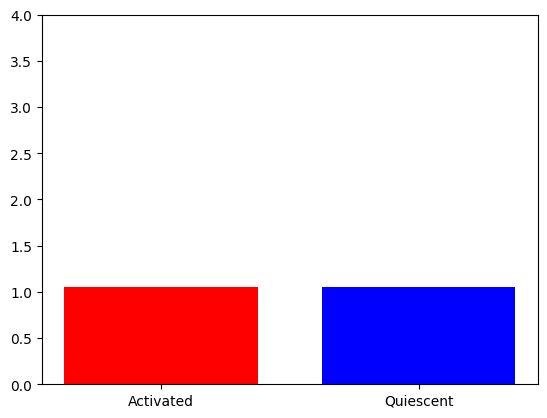

In [9]:
plt.bar(['Activated','Quiescent'], [(NTC_Act1 + NTC_Act2)/2, (NTC_Qui1 + NTC_Qui2)/2], color = ['r','b'],width = 0.75)
plt.ylim((0,4))
plt.savefig("figures/bulk_analysis_barplot_NTC.png", dpi=800, bbox_inches='tight')
plt.savefig("figures/bulk_analysis_barplot_NTC.svg", dpi=800, bbox_inches='tight')
plt.savefig("figures/bulk_analysis_barplot_NTC.pdf", dpi=800, bbox_inches='tight')

# Create Enr/Dep plots

In [17]:
dat['Cas_vs_Wt_lfc'] = np.log2( dat[dat.columns[dat.columns.str.contains('Cas9')]].mean(axis=1) / dat[dat.columns[dat.columns.str.contains('WT')]].mean(axis=1) )
dat['Cas_vs_Wt_pval'] =  stats.ttest_ind( dat[dat.columns[dat.columns.str.contains('Cas9')]], dat[dat.columns[dat.columns.str.contains('WT')]], axis=1 ).pvalue 
dat['Act_vs_Quies_lfc'] = np.log2( dat[dat.columns[dat.columns.str.contains('Activated')]].mean(axis=1) / dat[dat.columns[dat.columns.str.contains('Quiescent')]].mean(axis=1) )
dat['Act_vs_Quies_pval'] =  stats.ttest_ind( dat[dat.columns[dat.columns.str.contains('Activated')]], dat[dat.columns[dat.columns.str.contains('Quiescent')]], axis=1 ).pvalue 
dat.drop(columns=['Cas9_Activated24h_1','Cas9_Quiescent24h_1','WT_Total24h_1','Cas9_Activated24h_2','Cas9_Quiescent24h_2','WT_Total24h_2'], inplace=True)

In [18]:
datT['Cas_vs_Wt_lfc'] = np.log2( datT[datT.columns[datT.columns.str.contains('Cas9')]].mean(axis=1) / datT[datT.columns[datT.columns.str.contains('WT')]].mean(axis=1) )
datT['Cas_vs_Wt_pval'] =  stats.ttest_ind( datT[datT.columns[datT.columns.str.contains('Cas9')]], datT[datT.columns[datT.columns.str.contains('WT')]], axis=1 ).pvalue 
datT['Act_vs_Quies_lfc'] = np.log2( datT[datT.columns[datT.columns.str.contains('Activated')]].mean(axis=1) / datT[datT.columns[datT.columns.str.contains('Quiescent')]].mean(axis=1) )
datT['Act_vs_Quies_pval'] =  stats.ttest_ind( datT[datT.columns[datT.columns.str.contains('Activated')]], datT[datT.columns[datT.columns.str.contains('Quiescent')]], axis=1 ).pvalue 
datT.drop(columns=['Cas9_Activated24h_1','Cas9_Quiescent24h_1','WT_Total24h_1','Cas9_Activated24h_2','Cas9_Quiescent24h_2','WT_Total24h_2',
                  'Cas9_Activated24h_3','Cas9_Quiescent24h_3', 'Cas9_Activated24h_4','Cas9_Quiescent24h_4', ], inplace=True)

In [19]:
dat = pd.concat([dat,datT])
dat_comb = pd.DataFrame(index = dat.Gene.unique(), columns= ['Act_vs_Quies_lfc','Act_vs_Quies_pval', 'Cas_vs_Wt_lfc', 'Cas_vs_Wt_pval' ] )

In [20]:
dat

,Gene,Cas_vs_Wt_lfc,Cas_vs_Wt_pval,Act_vs_Quies_lfc,Act_vs_Quies_pval
ID,,,,,
Actl6a_As_76114,Actl6a,-1.014160,0.038259,-1.116990,0.016836
Actl6a_As_76115,Actl6a,-1.120976,0.044984,-0.976994,0.164084
Actl6a_As_76116,Actl6a,-1.357979,0.001500,-0.478676,0.232530
Arid1a_As_73073,Arid1a,-0.797488,0.226053,0.969830,0.157421
Arid1a_As_73074,Arid1a,-0.423629,0.250828,0.752462,0.021179
...,...,...,...,...,...
ZFP503_2,Zfp503,-0.212369,0.561851,-0.442577,0.184161
ZFP503_3,Zfp503,-0.286621,0.269205,-0.154925,0.557378
ZFP68_1,Zfp68,0.083564,0.738817,0.026854,0.910741


In [21]:
for ii in dat_comb.index:
    tmp = dat[dat.Gene == ii]
    dat_comb.loc[ii][['Act_vs_Quies_lfc']] = tmp[['Act_vs_Quies_lfc']].median(axis=0)
    dat_comb.loc[ii]['Act_vs_Quies_pval'] = stats.combine_pvalues(tmp['Act_vs_Quies_pval'])[1]
    dat_comb.loc[ii][['Cas_vs_Wt_lfc']] = tmp[['Cas_vs_Wt_lfc']].median(axis=0)
    dat_comb.loc[ii]['Cas_vs_Wt_pval'] = stats.combine_pvalues(tmp['Cas_vs_Wt_pval'])[1]

In [22]:
dat_comb['Act_vs_Quies_pval'] = mt.multipletests( dat_comb['Act_vs_Quies_pval'].values.tolist() , method = 'fdr_bh')[1]
dat_comb['Cas_vs_Wt_pval'] = mt.multipletests( dat_comb['Cas_vs_Wt_pval'].values.tolist() , method = 'fdr_bh')[1]

In [23]:
dat_comb['Act_vs_Quies_pval'] = -np.log10(dat_comb['Act_vs_Quies_pval'].astype('double') )
dat_comb['Act_vs_Quies_sig'] = (dat_comb['Act_vs_Quies_pval'] > -np.log10(0.1)) & (np.abs(dat_comb['Act_vs_Quies_lfc']) > 1)

dat_comb['Cas_vs_Wt_pval'] = -np.log10(dat_comb['Cas_vs_Wt_pval'].astype('double') )
dat_comb['Cas_vs_Wt_sig'] = (dat_comb['Cas_vs_Wt_pval'] > -np.log10(0.1)) & (np.abs(dat_comb['Cas_vs_Wt_lfc']) > 1)


In [24]:
dat_comb['Significance'] = dat_comb['Cas_vs_Wt_sig'].astype('double') + 2*dat_comb['Act_vs_Quies_sig'].astype('double')  
dat_comb['Significance'].astype('category')
dat_comb['Significance'][dat_comb['Significance'] == 0] = 'Not significant'
dat_comb['Significance'][dat_comb['Significance'] == 1] = 'Essential (2-sided)'
dat_comb['Significance'][dat_comb['Significance'] == 2] = 'PDGFRa (2-sided)'
dat_comb['Significance'][dat_comb['Significance'] == 3] = 'Sig. both screens'

/tmp/ipykernel_667/2396453297.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_comb['Significance'][dat_comb['Significance'] == 0] = 'Not significant'
/tmp/ipykernel_667/2396453297.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Not significant' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dat_comb['Significance'][dat_comb['Significance'] == 0] = 'Not significant'


In [26]:
dat_comb

,Act_vs_Quies_lfc,Act_vs_Quies_pval,Cas_vs_Wt_lfc,Cas_vs_Wt_pval,Act_vs_Quies_sig,Cas_vs_Wt_sig,Significance
Actl6a,-0.976994,0.828032,-1.120976,1.997280,False,True,Essential (2-sided)
Arid1a,0.951871,1.166776,-0.423629,0.152653,False,False,Not significant
Arid1b,0.430071,0.711331,-0.32805,0.364402,False,False,Not significant
Arid2,-1.235396,0.835024,-0.312745,0.003239,False,False,Not significant
Ash2l,0.929805,0.569455,-0.624073,0.351773,False,False,Not significant
...,...,...,...,...,...,...,...
Wt1,0.150509,0.587105,-0.340431,0.151814,False,False,Not significant
Zfp185,-0.146881,0.046557,-0.197073,0.028921,False,False,Not significant
Zfp36l1,-0.41761,1.176957,-0.285118,0.322311,False,False,Not significant
Zfp503,-0.19528,0.118367,-0.286621,0.201060,False,False,Not significant


/tmp/ipykernel_667/19536917.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texts = [plt.text(x = tmp.Cas_vs_Wt_lfc[ii], y=  tmp.Act_vs_Quies_lfc[ii],s = tmp.index[ii], ha='center', va='center', fontsize=14) for ii in range(tmp.shape[0])]


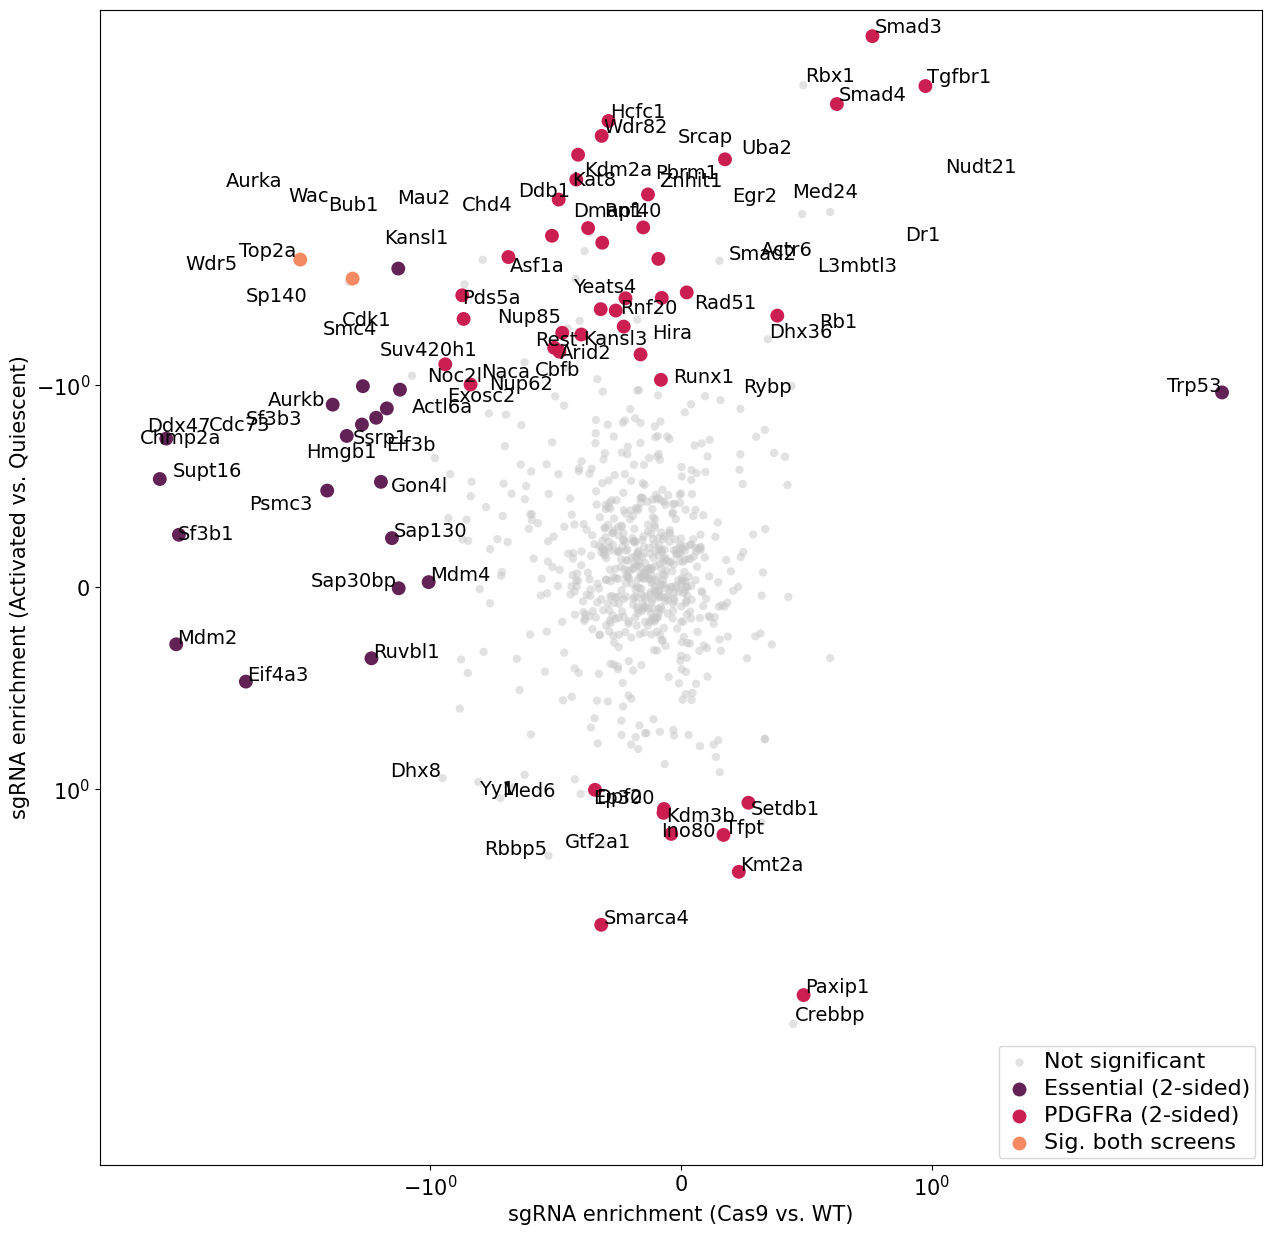

<Figure size 640x480 with 0 Axes>

In [27]:
plt.figure(figsize=(15,15)) #
#ax = plt.gca() #you first need to get the axis handle
#ax.set_aspect(1) #sets the height to width ratio to 1.5.
sns.set_palette("Greys", 2)
ax = sns.scatterplot(data = dat_comb[dat_comb['Significance'] == 'Not significant'], x='Cas_vs_Wt_lfc', y='Act_vs_Quies_lfc', hue = 'Significance', 
                     alpha = 0.5, edgecolor = 'none')
sns.set_palette("rocket", 3)
sns.scatterplot(data = dat_comb[dat_comb['Significance'] != 'Not significant'], x='Cas_vs_Wt_lfc', y='Act_vs_Quies_lfc', hue = 'Significance', 
                alpha = 0.99, edgecolor = 'none', ax = ax, s = 100 )

tmp = dat_comb[ (dat_comb['Significance'] != 'Not significant') | ((dat_comb.Act_vs_Quies_lfc**2 + dat_comb.Cas_vs_Wt_lfc**2)>1.5) ]

texts = [plt.text(x = tmp.Cas_vs_Wt_lfc[ii], y=  tmp.Act_vs_Quies_lfc[ii],s = tmp.index[ii], ha='center', va='center', fontsize=14) for ii in range(tmp.shape[0])]

adjust_text(texts)

ax.axes.set_title("",fontsize=13)
ax.set_xlabel("sgRNA enrichment (Cas9 vs. WT)",fontsize=15)
ax.set_ylabel("sgRNA enrichment (Activated vs. Quiescent)",fontsize=15)
ax.tick_params(labelsize=15)

ax.legend(loc='lower right')

plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='17') 

plt.yscale('symlog')
plt.xscale('symlog')


plt.xlim([-3, 3])
plt.ylim([-6, 6])
plt.savefig("figures/bulk_analysis_log_scale.png", dpi=800, bbox_inches='tight')
plt.savefig("figures/bulk_analysis_log_scale.svg", dpi=800, bbox_inches='tight')
plt.savefig("figures/bulk_analysis_log_scale.pdf", dpi=800, bbox_inches='tight')

plt.gca().invert_yaxis()

plt.show()


plt.clf()

/tmp/ipykernel_667/3326262906.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  texts = [plt.text(x = tmp.Cas_vs_Wt_lfc[ii], y=  tmp.Act_vs_Quies_lfc[ii],s = tmp.index[ii], ha='center', va='center', fontsize=14) for ii in range(tmp.shape[0])]


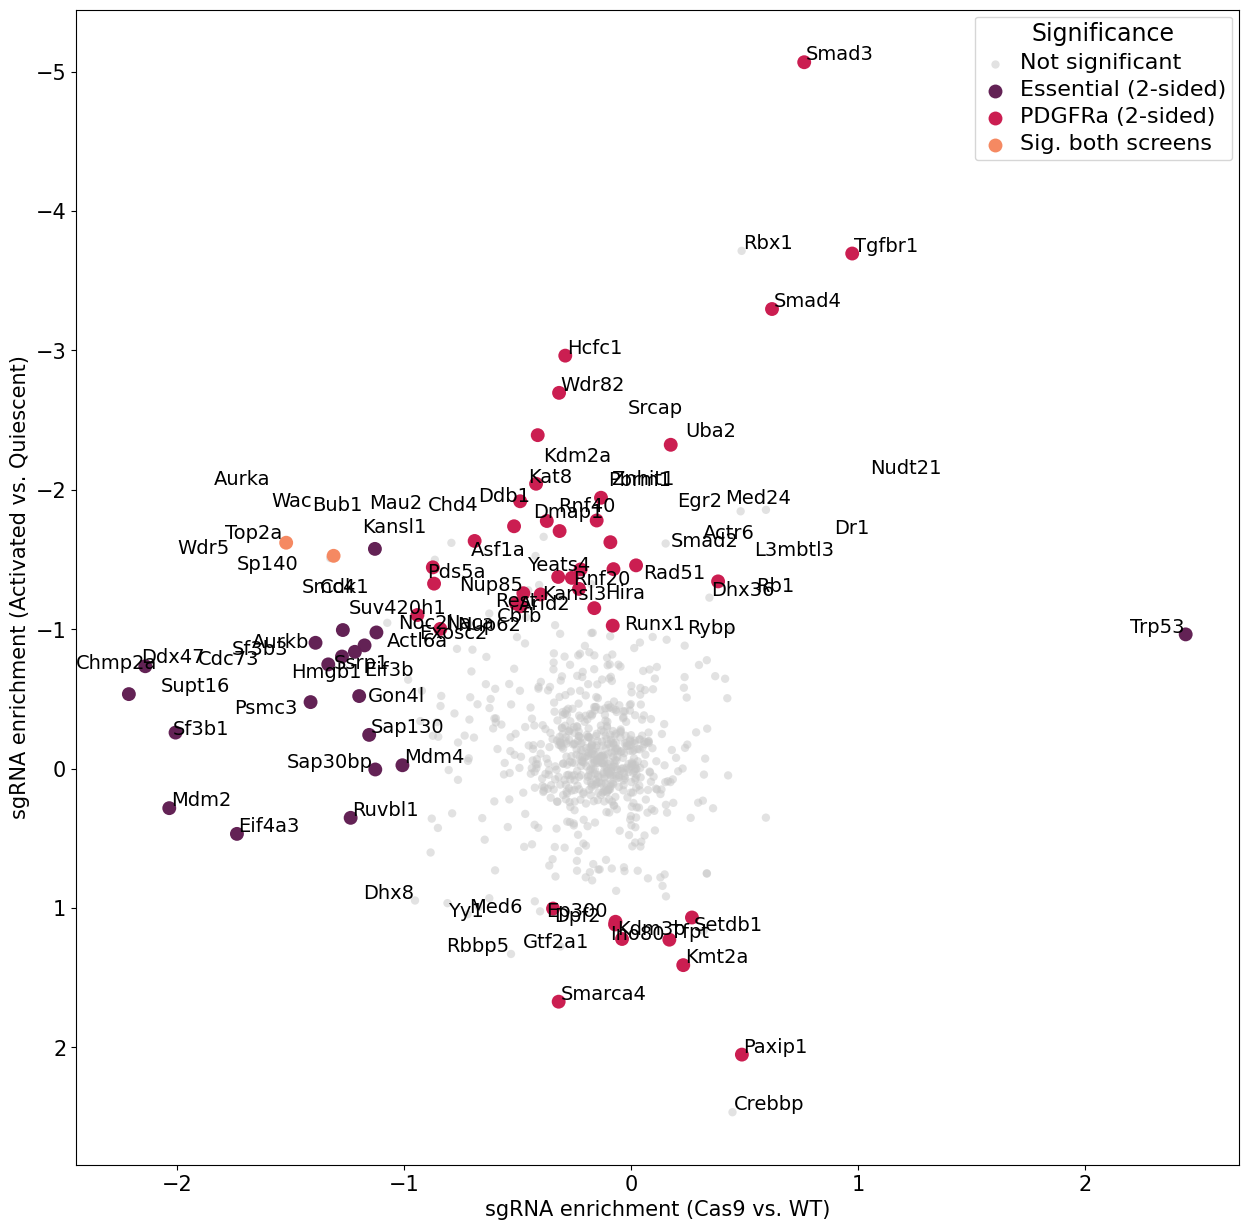

<Figure size 640x480 with 0 Axes>

In [28]:
plt.figure(figsize=(15,15)) #
#ax = plt.gca() #you first need to get the axis handle
#ax.set_aspect(1) #sets the height to width ratio to 1.5.
sns.set_palette("Greys", 2)
ax = sns.scatterplot(data = dat_comb[dat_comb['Significance'] == 'Not significant'], x='Cas_vs_Wt_lfc', y='Act_vs_Quies_lfc', hue = 'Significance', 
                     alpha = 0.5, edgecolor = 'none')
sns.set_palette("rocket", 3)
sns.scatterplot(data = dat_comb[dat_comb['Significance'] != 'Not significant'], x='Cas_vs_Wt_lfc', y='Act_vs_Quies_lfc', hue = 'Significance', 
                alpha = 0.99, edgecolor = 'none', ax = ax, s = 100 )

tmp = dat_comb[ (dat_comb['Significance'] != 'Not significant') | ((dat_comb.Act_vs_Quies_lfc**2 + dat_comb.Cas_vs_Wt_lfc**2)>1.5) ]

texts = [plt.text(x = tmp.Cas_vs_Wt_lfc[ii], y=  tmp.Act_vs_Quies_lfc[ii],s = tmp.index[ii], ha='center', va='center', fontsize=14) for ii in range(tmp.shape[0])]

adjust_text(texts)

ax.axes.set_title("",fontsize=13)
ax.set_xlabel("sgRNA enrichment (Cas9 vs. WT)",fontsize=15)
ax.set_ylabel("sgRNA enrichment (Activated vs. Quiescent)",fontsize=15)
ax.tick_params(labelsize=15)

plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='17') 

#plt.xlim([-2.75, 2.75])
#plt.ylim([-5.5,5.5])
plt.savefig("figures/bulk_analysis_lin_scale.png", dpi=800, bbox_inches='tight')
plt.savefig("figures/bulk_analysis_lin_scale.svg", dpi=800, bbox_inches='tight')
plt.savefig("figures/bulk_analysis_lin_scale.pdf", dpi=800, bbox_inches='tight')

plt.gca().invert_yaxis()

plt.show()


plt.clf()

In [44]:
dat_comb['Act_vs_Quies_lfc'][dat_comb['Significance'] == 'Sig. both screens']

Wdr5    -1.620752
Sp140   -1.526878
Name: Act_vs_Quies_lfc, dtype: object

In [41]:
(dat_comb['Act_vs_Quies_lfc'][dat_comb['Significance'] == 'PDGFRa (2-sided)'] < 0).sum()

33

In [42]:
dat_comb.groupby(['Significance']).count()

,Act_vs_Quies_lfc,Act_vs_Quies_pval,Cas_vs_Wt_lfc,Cas_vs_Wt_pval,Act_vs_Quies_sig,Cas_vs_Wt_sig
Significance,,,,,,
Essential (2-sided),20,20,20,20,20,20
Not significant,662,662,662,662,662,662
PDGFRa (2-sided),42,42,42,42,42,42
Sig. both screens,2,2,2,2,2,2


In [21]:
fehgf

NameError: name 'fehgf' is not defined

In [125]:
PC = pd.read_csv('ProteinComplexes.csv')
PC.set_index('Gene', inplace=True)
PC = PC.join(dat_comb)
PC_tmp = PC[['Cas_vs_Wt_lfc','Act_vs_Quies_lfc']].copy()
PC_tmp = PC_tmp.astype('float')
#PC_tmp = PC_tmp / PC_tmp.std()
PC_tmp

,Cas_vs_Wt_lfc,Act_vs_Quies_lfc
Gene,,
Arid2,-0.312745,-1.235396
Brd7,-0.082485,-0.819017
Pbrm1,-0.384761,-1.662800
Phf10,-0.190031,-0.227635
Brd9,0.147952,0.758872
...,...,...
Egr2,-0.151320,-1.780152
Runx1,-0.161833,-1.151424
Smad2,-0.091013,-1.624471


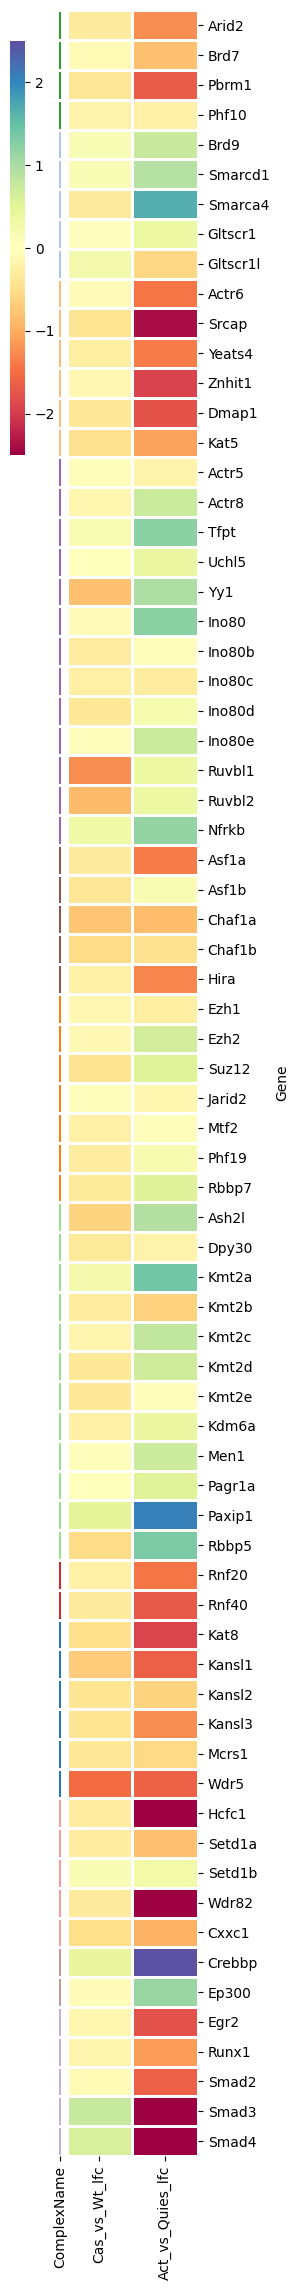

<Figure size 640x480 with 0 Axes>

In [137]:
lut = dict(zip(set( PC.ComplexName ), sns.color_palette("tab20", len(set( PC.ComplexName.unique() )) ) ))


g = sns.clustermap(data = PC_tmp,
                   row_cluster=False,
                   col_cluster=False,
               figsize=(3, 23),
                   #z_score=1,
               vmin = -2.5, vmax = 2.5,
               dendrogram_ratio=[0.2, 0.0001],
               cmap="Spectral",
               xticklabels =1, yticklabels=1,
               linewidth=1, linecolor='w', #square=True,
                row_colors=PC.ComplexName.map(lut)
              )
#ax.hlines([3, 6, 9], *ax.get_xlim())
#g.cax.set_visible(False)
#g.ax_row_dendrogram.set_visible(False)
#g.ax_col_dendrogram.set_visible(False)

plt.savefig("figures/select_protein_complexes.png", dpi=600)
plt.savefig("figures/select_protein_complexes.svg", dpi=600)
plt.savefig("figures/select_protein_complexes.pdf", dpi=600)

plt.show()
plt.clf()

In [ ]:
dat_comb

# Correlation plots

In [ ]:
dat_comb

In [ ]:
def clean_csv(dat, appendix):
    dat.rename(columns={'Unnamed: 0':'gene'}, inplace=True)
    dat.set_index('gene', inplace=True)
    dat.drop(columns={'baseMean','lfcSE','stat','padj'}, inplace = True)
    dat.rename(columns={'log2FoldChange':('log2FoldChange' + appendix),'pvalue':('pvalue' + appendix)}, inplace=True)
    return dat

In [ ]:
dat1 = pd.read_csv('/home/jupyter-jake/SharedData/collaborations/lara-fibroblast-mouse/AdrianData/condition_X14dpi_results_contrast.csv')
dat2 = pd.read_csv('/home/jupyter-jake/SharedData/collaborations/lara-fibroblast-mouse/AdrianData/condition_X7dpi_results_contrast.csv')
dat3 = pd.read_csv('/home/jupyter-jake/SharedData/collaborations/lara-fibroblast-mouse/AdrianData/condition_Zonal_results_contrast.csv')

In [ ]:
dat1 = clean_csv(dat1,'_X14')
dat2 = clean_csv(dat2,'_X7')
dat3 = clean_csv(dat3,'_Zonal')

In [ ]:
dat_total = pd.concat([dat1,dat2,dat3], axis=1)
dat_total

In [ ]:
dat_total

In [ ]:
dat_comb

In [ ]:
dat_comparison = pd.concat([dat_total,dat_comb], axis=1)

In [ ]:
ind_keep1 = (dat_comparison.pvalue_X14 < 0.05) | (dat_comparison.pvalue_X7 < 0.05) | (dat_comparison.pvalue_Zonal < 0.05)
ind_keep2 = dat_comparison.Act_vs_Quies_sig.copy() == True
#ind_keep2 = ~pd.isna(dat_comparison.Act_vs_Quies_sig.copy())
dat_comparison = dat_comparison[ind_keep1 & ind_keep2]
dat_comparison

In [ ]:
dat_comparison.Act_vs_Quies_sig.copy() 

In [ ]:
sns.scatterplot(data=dat_comparison, x = 'Act_vs_Quies_lfc',y = 'log2FoldChange_X14')

In [ ]:
sns.scatterplot(data=dat_comparison, x = 'Act_vs_Quies_lfc',y = 'log2FoldChange_X7')

In [ ]:
sns.scatterplot(data=dat_comparison, x = 'Act_vs_Quies_lfc',y = 'log2FoldChange_Zonal')

In [ ]:
sns.scatterplot(data=dat_comparison, x = 'log2FoldChange_X14',y = 'log2FoldChange_X7')